In [160]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/Statistical2/train.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test = pd.read_csv("/content/drive/MyDrive/Statistical2/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Procesamiento de datos

In [5]:
dataset = dataset.drop(['Name', 'Ticket', 'Cabin'], axis = 1)
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [6]:
test = test.drop(['Name', 'Ticket', 'Cabin'], axis = 1)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [7]:
dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
#Label encoder
dataset['Embarked'] = dataset['Embarked'].astype('category')
dataset['Embarked'] = dataset['Embarked'].cat.codes
dataset['Sex'] = dataset['Sex'].astype('category')
dataset['Sex'] = dataset['Sex'].cat.codes
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [9]:
#Label encoder
test['Embarked'] = test['Embarked'].astype('category')
test['Embarked'] = test['Embarked'].cat.codes
test['Sex'] = test['Sex'].astype('category')
test['Sex'] = test['Sex'].cat.codes
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [10]:
#verificación de NAs
def getNanColNames(df):
    colnames = df.columns
    cols_con_na = []
    for col in colnames:
        if(df[col].isnull().sum() > 0):
            cols_con_na.append(col)
    return cols_con_na

In [11]:
cols_con_nan = getNanColNames(test)
cols_con_nan

['Age', 'Fare']

In [12]:
cols_con_nan = getNanColNames(dataset)
cols_con_nan

['Age']

In [13]:
def FillNaN_Corr_DF(df, col1, col2):
    mean_val = np.round(df[col1].mean(), 0)
    print(f'La media es: {mean_val}')
    median_val = np.round(df[col1].median(), 0)
    print(f'La mediana es: {median_val}')
    dfMeanImp = df[col1].fillna(mean_val)
    dfMeadianImp = df[col1].fillna(median_val)
    corr1 = np.corrcoef(dfMeanImp, df[col2])[0,1]
    corr2 = np.corrcoef(dfMeadianImp, df[col2])[0,1]
    print(corr1)
    print(corr2)
    if corr1 >= corr2:
        df[col1] = df[col1].fillna(mean_val)
    else:
        df[col1] = df[col1].fillna(median_val)
    print('Validacion Valores Nullos:')
    print(df[col1].isnull().sum())
    

In [14]:
FillNaN_Corr_DF(dataset, 'Age', 'Survived')

La media es: 30.0
La mediana es: 28.0
-0.07065723128500334
-0.06491041993052589
Validacion Valores Nullos:
0


In [15]:
FillNaN_Corr_DF(test, 'Fare', 'Sex')

La media es: 36.0
La mediana es: 14.0
-0.19137038048306632
-0.19204927700269603
Validacion Valores Nullos:
0


In [16]:
FillNaN_Corr_DF(test, 'Age', 'Sex')

La media es: 30.0
La mediana es: 27.0
-0.0006624085608094862
-0.00803451166275829
Validacion Valores Nullos:
0


In [17]:
dataset.isnull().values.any()

False

In [18]:
test.isnull().values.any()

False

## Descripción de Arquitectura de Red con Keras

In [20]:
X_train = dataset.iloc[:, dataset.columns != 'Survived']
y_train = dataset.loc[:, 'Survived']

In [22]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)

In [23]:
X_test = test
X_test = std_scaler.fit_transform(X_test)

In [24]:
X_train.shape[1]

8

## 1ra Estructura (Softmax/Adam - 3 y 3 Units)

In [42]:
inputs = X_train.shape[1]

#base secuencial para definir la estructura de la Red (SIEMPRE INICIAR CON SQUENTIAL)
clasificador = Sequential()

#primera capa oclta
clasificador.add(Dense(input_dim = 8, units=3, activation='softmax', kernel_initializer='uniform'))

#segunda capa oculta
clasificador.add(Dense(units=3, activation='softmax', kernel_initializer='uniform'))

#capa de salida
clasificador.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))

In [43]:
#parametros de optimización
clasificador.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#parametros de entrenamiento.
clasificador.fit(X_train, y_train, batch_size=25, epochs=150)

Epoch 1/150
36/36 [==============================] - 1s 2ms/step - loss: 0.6885 - accuracy: 0.6162
Epoch 2/150
36/36 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.6162
Epoch 3/150
36/36 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.6162
Epoch 4/150
36/36 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.6162
Epoch 5/150
36/36 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 0.6162
Epoch 6/150
36/36 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.6162
Epoch 7/150
36/36 [==============================] - 0s 2ms/step - loss: 0.6696 - accuracy: 0.6162
Epoch 8/150
36/36 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.6162
Epoch 9/150
36/36 [==============================] - 0s 2ms/step - loss: 0.6665 - accuracy: 0.6162
Epoch 10/150
36/36 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.6162
Epoch 11/

In [50]:
# Guardardamos la red.
path = '/content/drive/MyDrive/Statistical2' 
clasificador.save(path + '3_3_adm_out.h5')

In [51]:
# Cargamos la red.
model_1 = keras.models.load_model(path + '3_3_adm_out.h5')

In [65]:
#predicciones
y_preds = model_1.predict(X_test)

In [66]:
y_preds = np.where(y_preds > 0.5, 1, 0)
y_preds = pd.DataFrame(y_preds, columns=['Survived'])
y_preds['Index'] = y_preds.index
y_preds['Index'] += 892
y_preds = y_preds.rename_axis('PassengerId').reset_index()
y_preds = y_preds.drop(['Index'], axis = 1)
y_preds.set_index('PassengerId',inplace=True)
y_preds.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [64]:
y_preds.to_csv('/content/drive/MyDrive/Statistical2/model_1.csv')

## 2da Estructura Kfolds (Softmax/Adam 3-3 Units)

In [110]:
def red_v1():
  #base secuencial para definir la estructura de la Red (SIEMPRE INICIAR CON SQUENTIAL)
  clasificador = Sequential()

  #primera capa oclta
  clasificador.add(Dense(input_dim = 8, units=3, activation='softmax', kernel_initializer='uniform'))

  #segunda capa oculta
  clasificador.add(Dense(units=2, activation='softmax', kernel_initializer='uniform'))

  #capa de salida
  clasificador.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))

  #parametros de optimización
  clasificador.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  return clasificador

In [111]:
clasificador = KerasClassifier(build_fn=red_v1, batch_size=25, nb_epoch=5000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [112]:
kfolds = KFold(n_splits=10, shuffle=True)

accs = cross_val_score(clasificador, X=X_train, y=y_train, cv=kfolds, verbose=1, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.0s finished


In [115]:
clasificador.fit(X_train, y_train)

36/36 [==============================] - 1s 2ms/step - loss: 0.6903 - accuracy: 0.5825


In [120]:
y_preds2 = clasificador.predict(X_test)

In [121]:
y_preds2 = np.where(y_preds2 > 0.5, 1, 0)
y_preds2 = pd.DataFrame(y_preds2, columns=['Survived'])
y_preds2['Index'] = y_preds2.index
y_preds2['Index'] += 892
y_preds2 = y_preds2.rename_axis('PassengerId').reset_index()
y_preds2 = y_preds2.drop(['Index'], axis = 1)
y_preds2.set_index('PassengerId',inplace=True)
y_preds2.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [123]:
y_preds2.to_csv('/content/drive/MyDrive/Statistical2/model_2.csv')

## 3ra Estructura (Softplus/Adam - 3 y 2 Units)

In [138]:
#base secuencial para definir la estructura de la Red (SIEMPRE INICIAR CON SQUENTIAL)
clasificador = Sequential()

#primera capa oclta
clasificador.add(Dense(input_dim = 8, units=3, activation='softplus', kernel_initializer='uniform'))

#segunda capa oculta
clasificador.add(Dense(units=2, activation='softplus', kernel_initializer='uniform'))

#capa de salida
clasificador.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))

In [139]:
#parametros de optimización
clasificador.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#parametros de entrenamiento.
clasificador.fit(X_train, y_train, batch_size=15, epochs=150)

Epoch 1/150
60/60 [==============================] - 1s 2ms/step - loss: 0.6869 - accuracy: 0.6162
Epoch 2/150
60/60 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.6162
Epoch 3/150
60/60 [==============================] - 0s 2ms/step - loss: 0.6687 - accuracy: 0.6162
Epoch 4/150
60/60 [==============================] - 0s 2ms/step - loss: 0.6573 - accuracy: 0.6162
Epoch 5/150
60/60 [==============================] - 0s 2ms/step - loss: 0.6434 - accuracy: 0.6162
Epoch 6/150
60/60 [==============================] - 0s 2ms/step - loss: 0.6278 - accuracy: 0.6162
Epoch 7/150
60/60 [==============================] - 0s 2ms/step - loss: 0.6136 - accuracy: 0.6162
Epoch 8/150
60/60 [==============================] - 0s 2ms/step - loss: 0.6018 - accuracy: 0.6162
Epoch 9/150
60/60 [==============================] - 0s 2ms/step - loss: 0.5917 - accuracy: 0.6162
Epoch 10/150
60/60 [==============================] - 0s 2ms/step - loss: 0.5821 - accuracy: 0.6162
Epoch 11/

In [131]:
# Guardardamos la red.
path = '/content/drive/MyDrive/Statistical2' 
clasificador.save(path + '3_2_adam_out.h5')

In [71]:
# Cargamos la red.
model_3 = keras.models.load_model(path + '3_2_adam_out.h5')

In [72]:
#predicciones
y_preds3 = model_3.predict(X_test)

In [73]:
y_preds3 = np.where(y_preds3 > 0.5, 1, 0)
y_preds3 = pd.DataFrame(y_preds3, columns=['Survived'])
y_preds3['Index'] = y_preds3.index
y_preds3['Index'] += 892
y_preds3 = y_preds3.rename_axis('PassengerId').reset_index()
y_preds3 = y_preds3.drop(['Index'], axis = 1)
y_preds3.set_index('PassengerId',inplace=True)
y_preds3.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [74]:
y_preds3.to_csv('/content/drive/MyDrive/Statistical2/model_3.csv')

## 4ta Estructura (Softmax/Adam - 8 y 5 Units)

In [140]:
#base secuencial para definir la estructura de la Red (SIEMPRE INICIAR CON SQUENTIAL)
clasificador = Sequential()

#primera capa oclta
clasificador.add(Dense(input_dim = 8, units=8, activation='softmax', kernel_initializer='lecun_normal'))

#segunda capa oculta
clasificador.add(Dense(units=5, activation='softmax', kernel_initializer='lecun_normal'))

#capa de salida
clasificador.add(Dense(units=1, activation='sigmoid', kernel_initializer='lecun_normal'))

In [144]:
#parametros de optimización
clasificador.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

#parametros de entrenamiento.
clasificador.fit(X_train, y_train, batch_size=30, epochs=500)

Epoch 1/500
30/30 [==============================] - 1s 2ms/step - loss: 0.1180 - accuracy: 0.8496
Epoch 2/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1178 - accuracy: 0.8496
Epoch 3/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1177 - accuracy: 0.8496
Epoch 4/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1177 - accuracy: 0.8496
Epoch 5/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1178 - accuracy: 0.8485
Epoch 6/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1176 - accuracy: 0.8507
Epoch 7/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1176 - accuracy: 0.8496
Epoch 8/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1176 - accuracy: 0.8507
Epoch 9/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1176 - accuracy: 0.8496
Epoch 10/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1176 - accuracy: 0.8485
Epoch 11/

In [145]:
# Guardardamos la red.
path = '/content/drive/MyDrive/Statistical2' 
clasificador.save(path + '8_5_adam_out.h5')

In [148]:
# Cargamos la red.
model_4 = keras.models.load_model(path + '8_5_adam_out.h5')

In [149]:
#predicciones
y_preds4 = model_4.predict(X_test)

In [151]:
y_preds4 = np.where(y_preds4 > 0.5, 1, 0)
y_preds4 = pd.DataFrame(y_preds4, columns=['Survived'])
y_preds4['Index'] = y_preds4.index
y_preds4['Index'] += 892
y_preds4 = y_preds4.rename_axis('PassengerId').reset_index()
y_preds4 = y_preds4.drop(['Index'], axis = 1)
y_preds4.set_index('PassengerId',inplace=True)
y_preds4.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [152]:
y_preds4.to_csv('/content/drive/MyDrive/Statistical2/model_4.csv')

## 5ta Estructura (Selu/Adamax - 8 y 6 Units)

In [153]:
#base secuencial para definir la estructura de la Red (SIEMPRE INICIAR CON SQUENTIAL)
clasificador = Sequential()

#primera capa oclta
clasificador.add(Dense(input_dim = 8, units=8, activation='selu', kernel_initializer='lecun_normal'))

#segunda capa oculta
clasificador.add(Dense(units=6, activation='selu', kernel_initializer='lecun_normal'))

#capa de salida
clasificador.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))

In [154]:
#parametros de optimización
clasificador.compile(optimizer='adamax', loss='mse', metrics=['accuracy'])

#parametros de entrenamiento.
clasificador.fit(X_train, y_train, batch_size=10, epochs=500)

Epoch 1/500
90/90 [==============================] - 1s 1ms/step - loss: 0.2464 - accuracy: 0.6285
Epoch 2/500
90/90 [==============================] - 0s 2ms/step - loss: 0.2372 - accuracy: 0.7082
Epoch 3/500
90/90 [==============================] - 0s 2ms/step - loss: 0.2228 - accuracy: 0.7407
Epoch 4/500
90/90 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.7531
Epoch 5/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1907 - accuracy: 0.7654
Epoch 6/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1791 - accuracy: 0.7733
Epoch 7/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1708 - accuracy: 0.7778
Epoch 8/500
90/90 [==============================] - 0s 1ms/step - loss: 0.1641 - accuracy: 0.7789
Epoch 9/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.7733
Epoch 10/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1544 - accuracy: 0.7811
Epoch 11/

In [155]:
# Guardardamos la red.
path = '/content/drive/MyDrive/Statistical2' 
clasificador.save(path + '8_6_adamx_out.h5')

In [156]:
# Cargamos la red.
model_5 = keras.models.load_model(path + '8_6_adamx_out.h5')

In [157]:
#predicciones
y_preds5 = model_5.predict(X_test)

In [158]:
y_preds5 = np.where(y_preds5 > 0.5, 1, 0)
y_preds5 = pd.DataFrame(y_preds5, columns=['Survived'])
y_preds5['Index'] = y_preds5.index
y_preds5['Index'] += 892
y_preds5 = y_preds5.rename_axis('PassengerId').reset_index()
y_preds5 = y_preds5.drop(['Index'], axis = 1)
y_preds5.set_index('PassengerId',inplace=True)
y_preds5.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [159]:
y_preds5.to_csv('/content/drive/MyDrive/Statistical2/model_5.csv')

## Resultados de 5 estructuras

## **Resultados**


---

## La estructura con el mejor resultado es la # 4 con activadores 'Softmax' en las capas y 'sigmoid' en la salida. Los inicializadores de Kernel en 'lecun_normal' para capas y salida. En cuanto compilación, se utilizó un parametro loss 'mse' y la optimización resulta más eficiente con el modelo 'Adam'; otras como  'Adamax' resulta eficiente en termino medio, mientras 'SGD' arrojaba resultados malos para el modelo. 

### 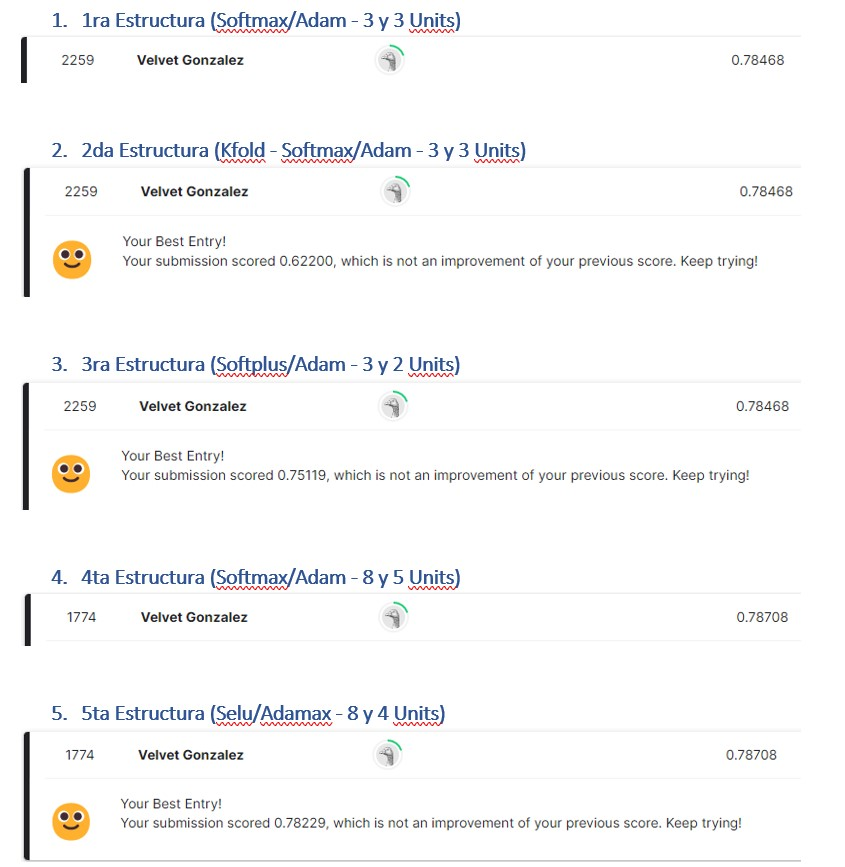